In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

import json
import csv
import re

%matplotlib inline

In [39]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 5.0 MB/s eta 0:00:00


In [43]:
!pip install networkx

In [13]:
pd.set_option('display.max_rows', None)

In [4]:
with open('players.json', 'r') as json_file:
    data = json.load(json_file)

csv_file = open('players.csv', 'w', newline='')
csv_writer = csv.writer(csv_file)

header = data[0].keys()
csv_writer.writerow(header)

for player in data:
    player["passportArea"] = player['passportArea']['name']
    player['role'] = player['role']['name']
    player['birthArea'] = player['birthArea']['name']
    csv_writer.writerow(player.values())

csv_file.close()

print("Conversion successful!")

Conversion successful!


In [16]:
with open('teams.json', 'r') as json_file:
    data = json.load(json_file)

# Define CSV file and header
csv_file = open('teams.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)

# Write header to CSV
header = ["city", "name", "wyId", "officialName", "area", "type"]
csv_writer.writerow(header)

# Write data to CSV
for team in data:
    area_name = team["area"]["name"]
    team["area"] = area_name
    csv_writer.writerow(team.values())

# Close CSV file
csv_file.close()
print("Conversion successful!")

Conversion successful!


In [19]:
import os

def json_to_csv(input_file, output_file):
    with open(input_file, 'r') as json_file:
        data = json.load(json_file)
    
    # Define CSV file and header
    with open(output_file, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        # Write header to CSV
        header = ["status", "roundId", "gameweek", "home_team_id", "home_team_score", "away_team_id", "away_team_score"]
        csv_writer.writerow(header)
        
        # Write data to CSV
        for match in data:
            home_team_id = list(match["teamsData"].keys())[0]
            away_team_id = list(match["teamsData"].keys())[1]
            home_team_score = match["teamsData"][home_team_id]["score"]
            away_team_score = match["teamsData"][away_team_id]["score"]
            csv_writer.writerow([match["status"], match["roundId"], match["gameweek"], home_team_id, home_team_score, away_team_id, away_team_score])

# Path to the matches folder
matches_folder = "matches"

# Iterate through files in the matches folder
for filename in os.listdir(matches_folder):
    if filename.endswith(".json"):
        input_file = os.path.join(matches_folder, filename)
        output_file = os.path.splitext(input_file)[0] + ".csv"
        json_to_csv(input_file, output_file)

print("Conversion successful!")

Conversion successful!


In [17]:
teams_df = pd.read_csv("teams.csv")
teams_df

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,England,club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,Spain,club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,Spain,club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,Spain,club
4,Valencia,Levante,695,Levante UD,Spain,club
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,France,club
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,Spain,club
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,Germany,club
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,England,club
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,Spain,club


In [3]:
events_df = pd.read_csv("eventid2name.csv")
events_df.head()

,event,subevent,event_label,subevent_label
0,1,10,Duel,Air duel
1,1,11,Duel,Ground attacking duel
2,1,12,Duel,Ground defending duel
3,1,13,Duel,Ground loose ball duel
4,2,20,Foul,Foul


In [6]:
players_df = pd.read_csv('players.csv')
players_df.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,Turkey,78,Harun,NaN,Tekin,4502.0,1989-06-17,187,Goalkeeper,Turkey,32777,right,H. Tekin,4687.0
1,Senegal,73,Malang,NaN,Sarr,3775.0,1999-01-23,182,Defender,France,393228,left,M. Sarr,4423.0
2,France,72,Over,NaN,Mandanda,3772.0,1998-10-26,176,Goalkeeper,France,393230,NaN,O. Mandanda,NaN
3,Senegal,82,Alfred John Momar,NaN,N'Diaye,683.0,1990-03-06,187,Midfielder,France,32793,right,A. N'Diaye,19314.0
4,France,84,Ibrahima,NaN,Konat\u00e9,2975.0,1999-05-25,192,Defender,France,393247,right,I. Konat\u00e9,NaN


In [20]:
england_df = pd.read_csv("matches/matches_England.csv")
england_df.head()

,status,roundId,gameweek,home_team_id,home_team_score,away_team_id,away_team_score
0,Played,4405654,38,1646,1,1659,2
1,Played,4405654,38,1628,2,1627,0
2,Played,4405654,38,1609,1,1673,0
3,Played,4405654,38,1651,0,1612,4
4,Played,4405654,38,1644,0,1611,1


In [21]:
france_df = pd.read_csv("matches/matches_France.csv")
france_df.head()

,status,roundId,gameweek,home_team_id,home_team_score,away_team_id,away_team_score
0,Played,4405655,38,3783,0,3767,0
1,Played,4405655,38,3804,2,3799,1
2,Played,4405655,38,3766,3,3775,2
3,Played,4405655,38,3771,2,3789,1
4,Played,4405655,38,3772,4,3777,0


In [22]:
eu_championship_df = pd.read_csv("matches/matches_European_Championship.csv")
eu_championship_df.head()

,status,roundId,gameweek,home_team_id,home_team_score,away_team_id,away_team_score
0,Played,4165474,0,9905,0,4418,0
1,Played,4165473,0,3148,0,4418,2
2,Played,4165473,0,10682,0,9905,2
3,Played,4165472,0,7839,2,4418,5
4,Played,4165472,0,3148,1,3757,1


In [23]:
germany_df = pd.read_csv("matches/matches_Germany.csv")
germany_df.head()

,status,roundId,gameweek,home_team_id,home_team_score,away_team_id,away_team_score
0,Played,4405517,34,2444,1,2445,4
1,Played,4405517,34,2482,3,2447,1
2,Played,4405517,34,2457,2,2975,6
3,Played,4405517,34,2453,2,2481,0
4,Played,4405517,34,2449,1,2462,0


In [24]:
italy_df = pd.read_csv("matches/matches_Italy.csv")
italy_df.head()

,status,roundId,gameweek,home_team_id,home_team_score,away_team_id,away_team_score
0,Played,4406278,38,3162,2,3161,3
1,Played,4406278,38,3158,1,3315,0
2,Played,4406278,38,3173,1,3172,0
3,Played,4406278,38,3165,1,3219,0
4,Played,4406278,38,3166,0,3163,1


In [25]:
spain_df = pd.read_csv("matches/matches_Spain.csv")
spain_df.head()

,status,roundId,gameweek,home_team_id,home_team_score,away_team_id,away_team_score
0,Played,4406122,38,676,1,687,0
1,Played,4406122,38,679,2,701,2
2,Played,4406122,38,691,1,678,0
3,Played,4406122,38,674,2,677,1
4,Played,4406122,38,675,2,682,2


In [26]:
wc_df = pd.read_csv("matches/matches_World_Cup.csv")
wc_df.head()

,status,roundId,gameweek,home_team_id,home_team_score,away_team_id,away_team_score
0,Played,4165368,0,9598,2,4418,4
1,Played,4165367,0,2413,0,5629,2
2,Played,4165366,0,2413,1,9598,1
3,Played,4165366,0,5629,0,4418,1
4,Played,4165365,0,14358,1,9598,1


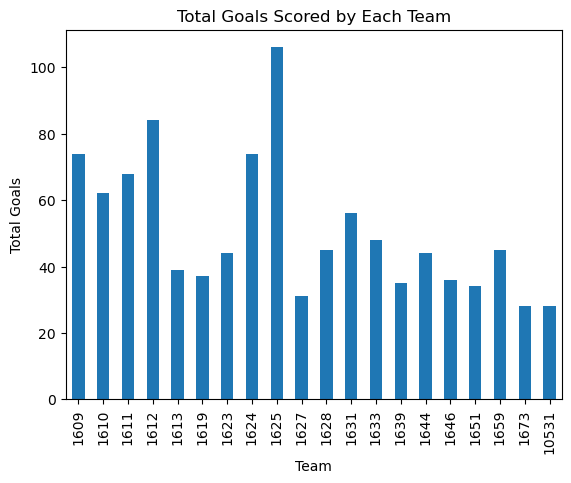

In [54]:
# Aggregate goals scored by each team across all matches
team_goals = pd.concat([england_df.groupby('home_team_id')['home_team_score'].sum(), 
                        england_df.groupby('away_team_id')['away_team_score'].sum()]).groupby(level=0).sum()

# Plot total goals scored by each team
team_goals.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.show()

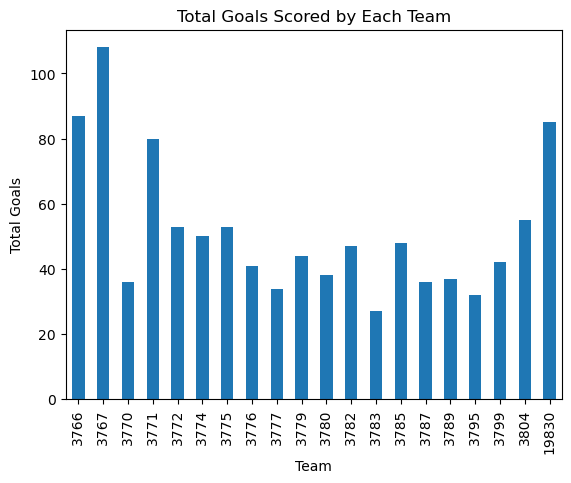

In [55]:
# Aggregate goals scored by each team across all matches
team_goals = pd.concat([france_df.groupby('home_team_id')['home_team_score'].sum(), 
                        france_df.groupby('away_team_id')['away_team_score'].sum()]).groupby(level=0).sum()

# Plot total goals scored by each team
team_goals.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.show()

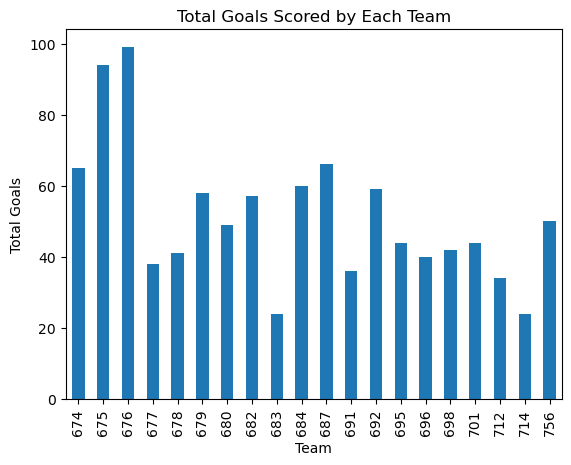

In [56]:
# Aggregate goals scored by each team across all matches
team_goals = pd.concat([spain_df.groupby('home_team_id')['home_team_score'].sum(), 
                        spain_df.groupby('away_team_id')['away_team_score'].sum()]).groupby(level=0).sum()

# Plot total goals scored by each team
team_goals.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.show()

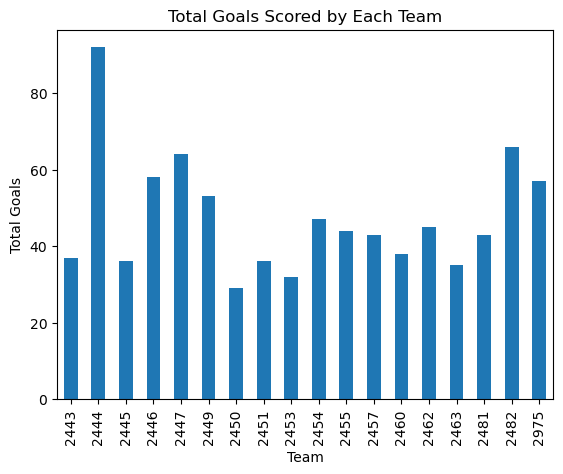

In [57]:
# Aggregate goals scored by each team across all matches
team_goals = pd.concat([germany_df.groupby('home_team_id')['home_team_score'].sum(), 
                        germany_df.groupby('away_team_id')['away_team_score'].sum()]).groupby(level=0).sum()

# Plot total goals scored by each team
team_goals.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.show()

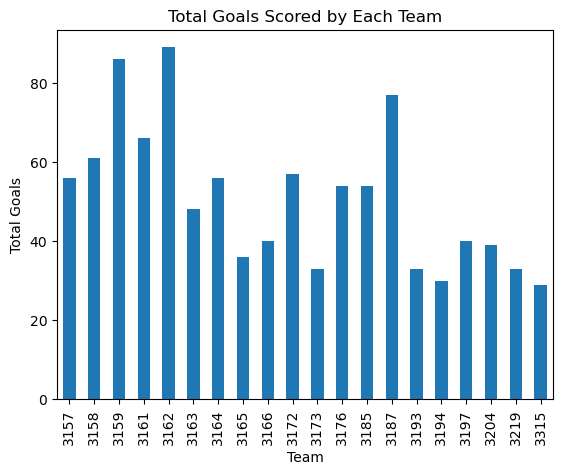

In [58]:
# Aggregate goals scored by each team across all matches
team_goals = pd.concat([italy_df.groupby('home_team_id')['home_team_score'].sum(), 
                        italy_df.groupby('away_team_id')['away_team_score'].sum()]).groupby(level=0).sum()

# Plot total goals scored by each team
team_goals.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.show()

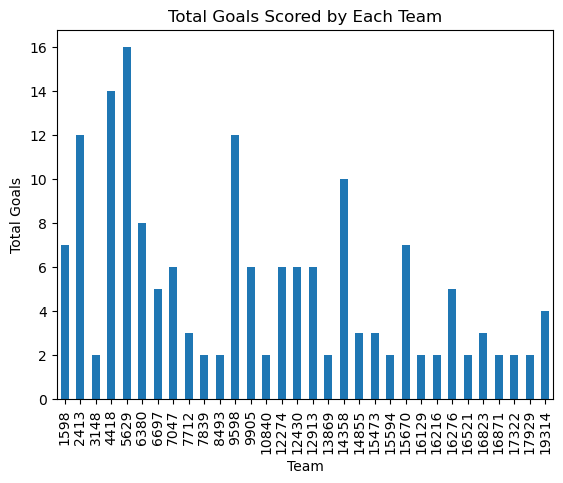

In [59]:
# Aggregate goals scored by each team across all matches
team_goals = pd.concat([wc_df.groupby('home_team_id')['home_team_score'].sum(), 
                        wc_df.groupby('away_team_id')['away_team_score'].sum()]).groupby(level=0).sum()

# Plot total goals scored by each team
team_goals.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.show()

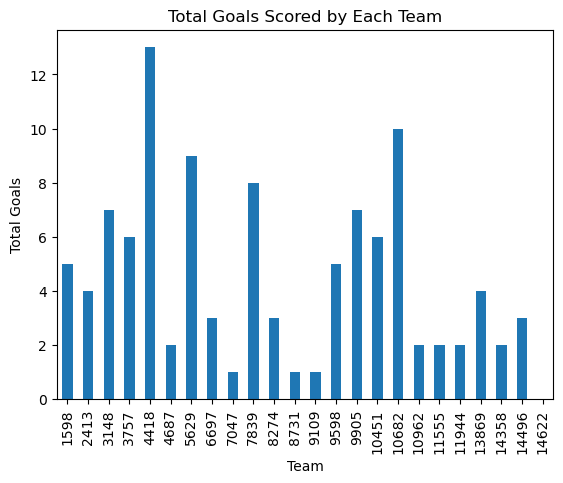

In [60]:
# Aggregate goals scored by each team across all matches
team_goals = pd.concat([eu_championship_df.groupby('home_team_id')['home_team_score'].sum(), 
                        eu_championship_df.groupby('away_team_id')['away_team_score'].sum()]).groupby(level=0).sum()

# Plot total goals scored by each team
team_goals.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


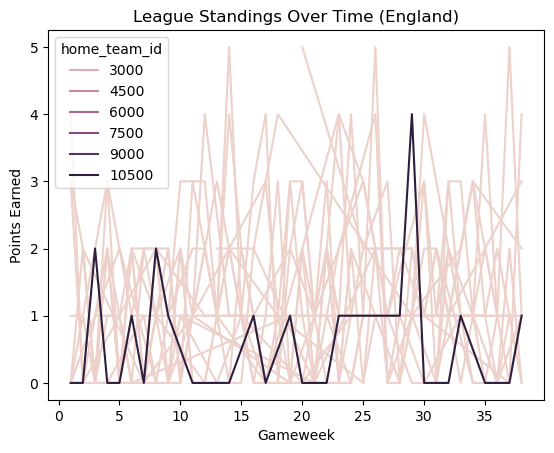

In [28]:
# Plotting standings of teams in the England league
sb.lineplot(data=england_df, x='gameweek', y='home_team_score', hue='home_team_id')
plt.xlabel('Gameweek')
plt.ylabel('Points Earned')
plt.title('League Standings Over Time (England)')
plt.show()


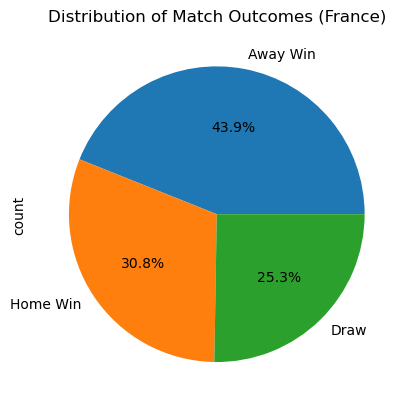

In [30]:
# Distribution of match outcomes in France
match_outcomes = france_df.apply(lambda x: 'Draw' if x['home_team_score'] == x['away_team_score'] else 'Home Win' if x['home_team_score'] > x['away_team_score'] else 'Away Win', axis=1)
match_outcomes.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Match Outcomes (France)')
plt.show()

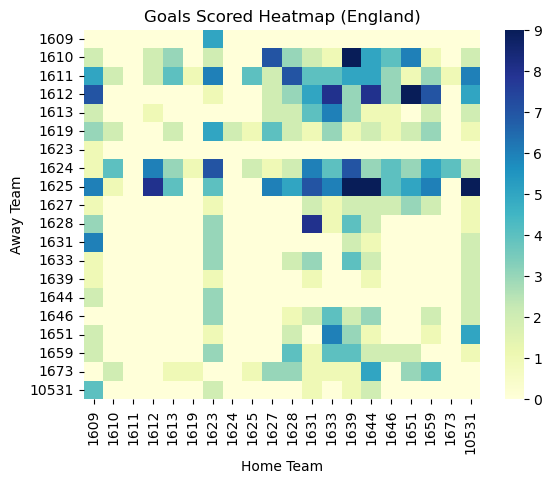

In [32]:
# Heatmap of goals scored in the England league
goals_heatmap = england_df.pivot_table(index='away_team_id', columns='home_team_id', values='away_team_score', aggfunc='sum', fill_value=0)
sb.heatmap(goals_heatmap, cmap='YlGnBu')
plt.xlabel('Home Team')
plt.ylabel('Away Team')
plt.title('Goals Scored Heatmap (England)')
plt.show()

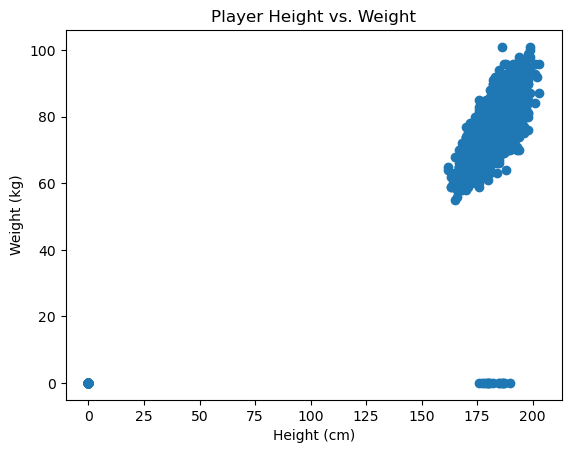

In [33]:
# Scatter plot of player height vs. weight
plt.scatter(players_df['height'], players_df['weight'])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Player Height vs. Weight')
plt.show()

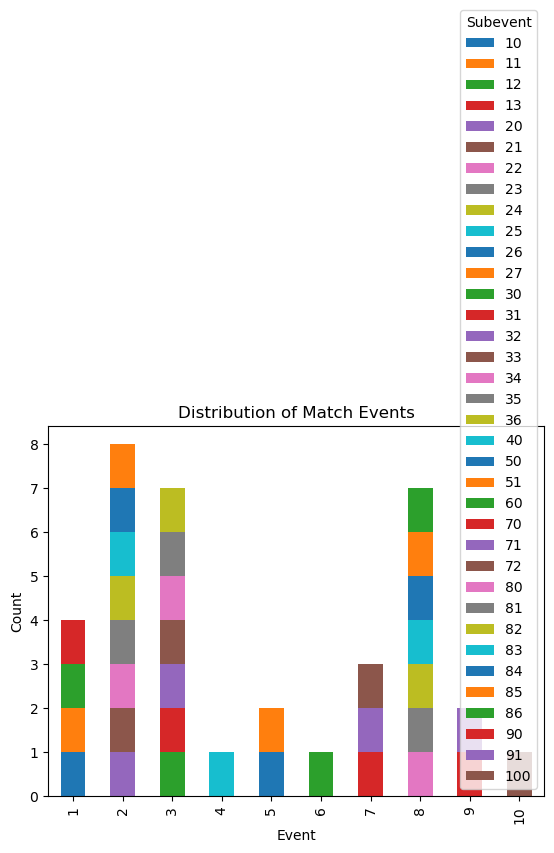

In [34]:
# Stacked bar chart of match events
match_events = events_df.groupby(['event', 'subevent']).size().unstack(fill_value=0)
match_events.plot(kind='bar', stacked=True)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Distribution of Match Events')
plt.legend(title='Subevent')
plt.show()

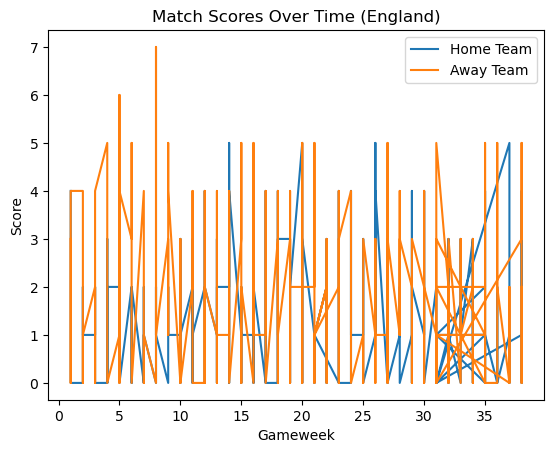

In [35]:
# Time series plot of match scores
plt.plot(england_df['gameweek'], england_df['home_team_score'], label='Home Team')
plt.plot(england_df['gameweek'], england_df['away_team_score'], label='Away Team')
plt.xlabel('Gameweek')
plt.ylabel('Score')
plt.title('Match Scores Over Time (England)')
plt.legend()
plt.show()

In [40]:
import folium

team_locations = {
    'Newcastle United': (54.9783, -1.6174),
    'Celta de Vigo': (42.2313, -8.7126),
    # Add more team locations as needed
}

map = folium.Map(location=[51.5074, -0.1278], zoom_start=5)
for team, location in team_locations.items():
    folium.Marker(location=location, popup=team).add_to(map)

map

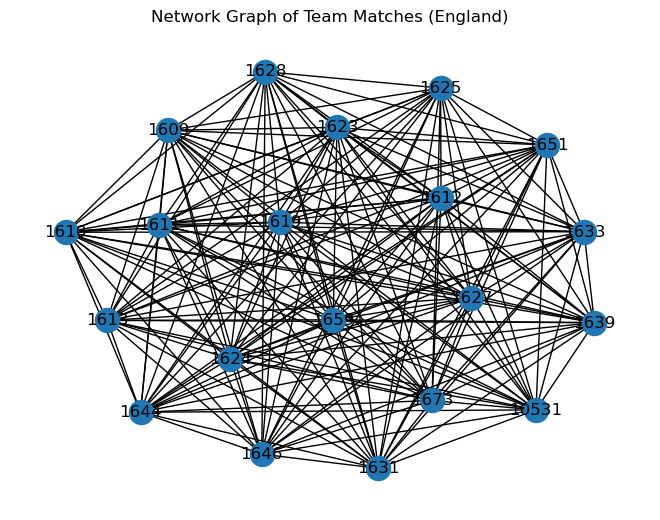

In [44]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(zip(england_df['home_team_id'], england_df['away_team_id']))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Team Matches (England)')
plt.show()

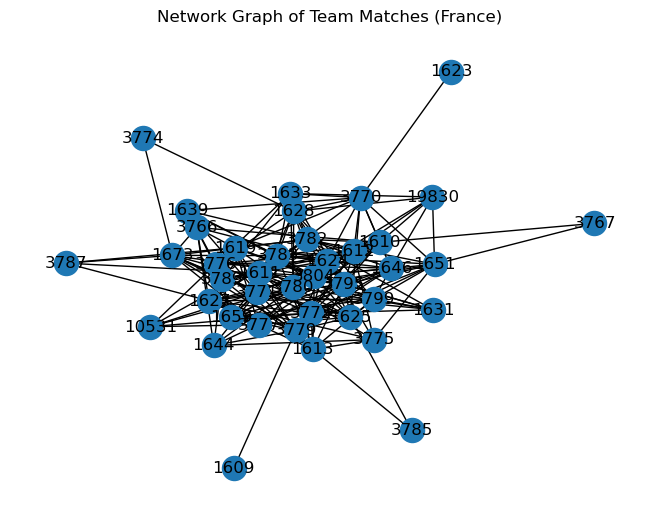

In [45]:
G = nx.Graph()
G.add_edges_from(zip(france_df['home_team_id'], england_df['away_team_id']))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Team Matches (France)')
plt.show()

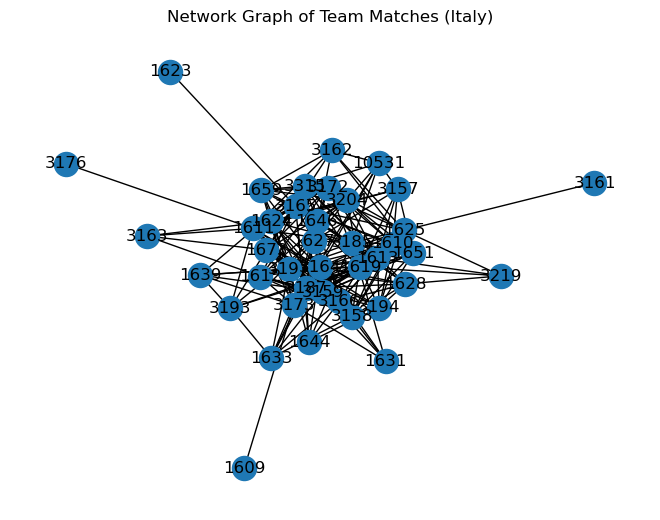

In [46]:
G = nx.Graph()
G.add_edges_from(zip(italy_df['home_team_id'], england_df['away_team_id']))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Team Matches (Italy)')
plt.show()

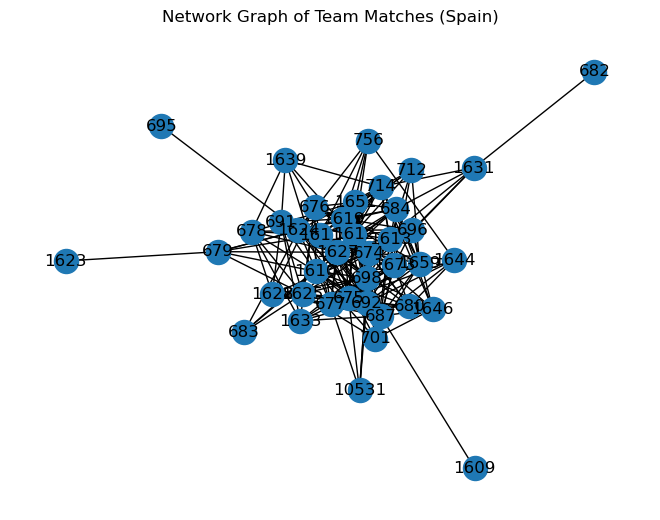

In [47]:
G = nx.Graph()
G.add_edges_from(zip(spain_df['home_team_id'], england_df['away_team_id']))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Team Matches (Spain)')
plt.show()

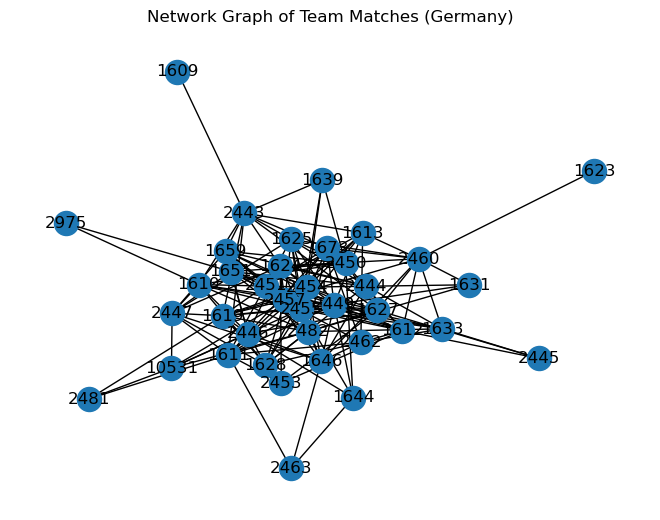

In [48]:
G = nx.Graph()
G.add_edges_from(zip(germany_df['home_team_id'], england_df['away_team_id']))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Team Matches (Germany)')
plt.show()

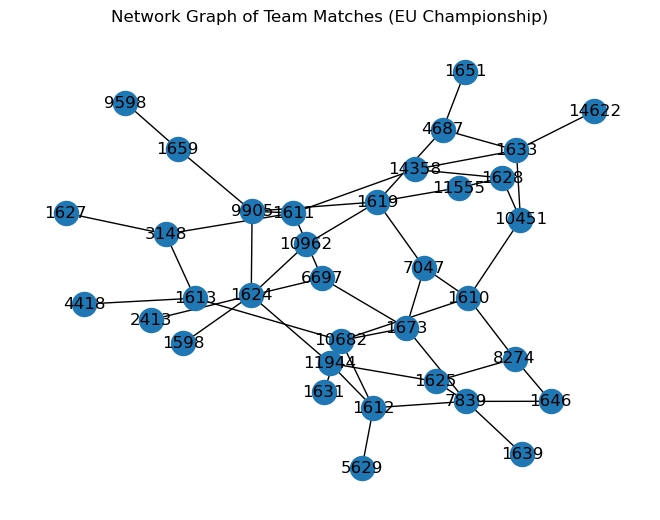

In [50]:
G = nx.Graph()
G.add_edges_from(zip(eu_championship_df['home_team_id'], england_df['away_team_id']))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Team Matches (EU Championship)')
plt.show()

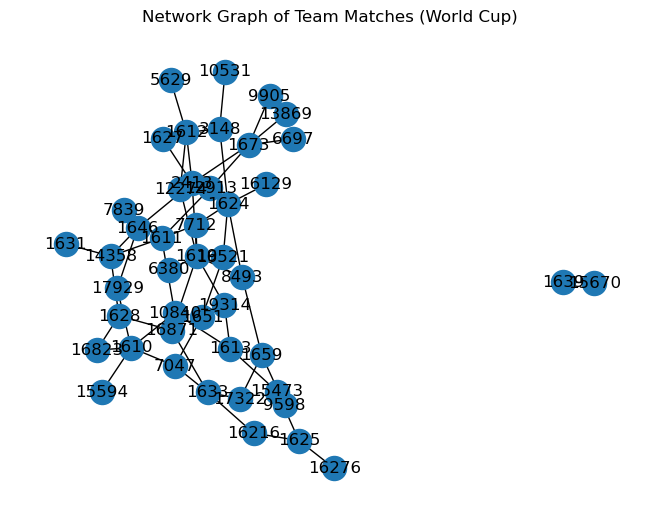

In [51]:
G = nx.Graph()
G.add_edges_from(zip(wc_df['home_team_id'], england_df['away_team_id']))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Team Matches (World Cup)')
plt.show()

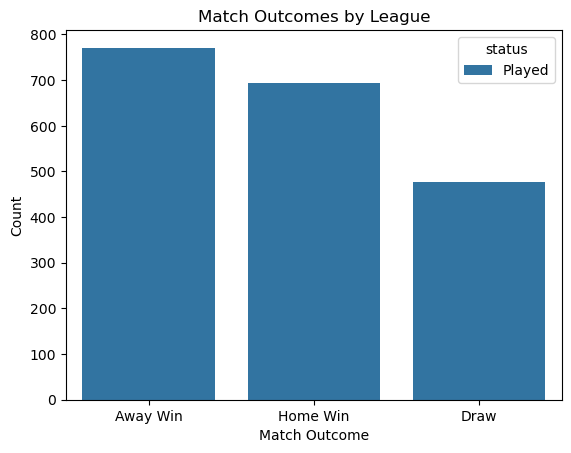

In [61]:
all_matches_df = pd.concat([england_df, france_df, germany_df, eu_championship_df, italy_df, spain_df, wc_df])

# Calculate match outcomes
match_outcomes = []
for idx, row in all_matches_df.iterrows():
    if row['home_team_score'] > row['away_team_score']:
        match_outcomes.append('Home Win')
    elif row['home_team_score'] < row['away_team_score']:
        match_outcomes.append('Away Win')
    else:
        match_outcomes.append('Draw')
all_matches_df['outcome'] = match_outcomes

# Plot stacked bar chart of match outcomes by league
sb.countplot(data=all_matches_df, x='outcome', hue='status')
plt.xlabel('Match Outcome')
plt.ylabel('Count')
plt.title('Match Outcomes by League')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


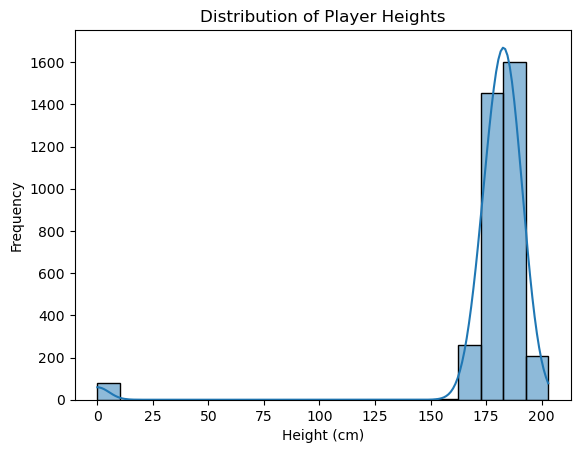

In [62]:
# Plot histogram of player heights
sb.histplot(players_df['height'], bins=20, kde=True)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Heights')
plt.show()

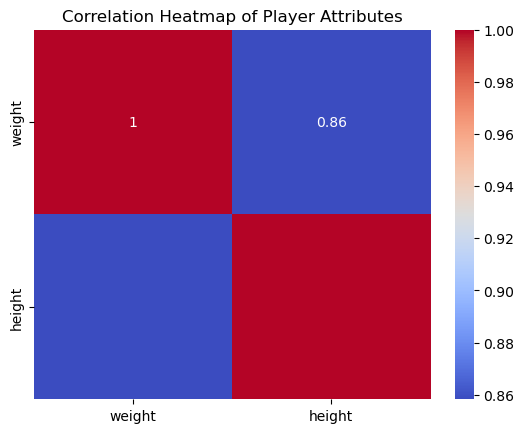

In [64]:
# Compute correlation matrix
corr = players_df[['weight', 'height']].corr()

# Plot correlation heatmap
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Player Attributes')
plt.show()

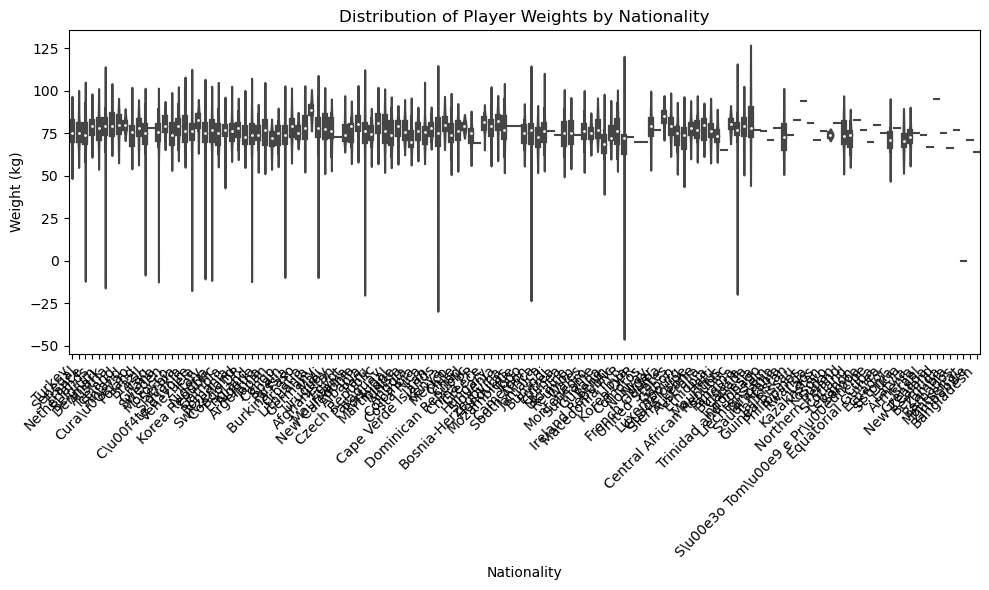

In [67]:
# Plot violin plot of player weights by nationality
plt.figure(figsize=(10, 6))
sb.violinplot(data=players_df, x='passportArea', y='weight')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.title('Distribution of Player Weights by Nationality')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

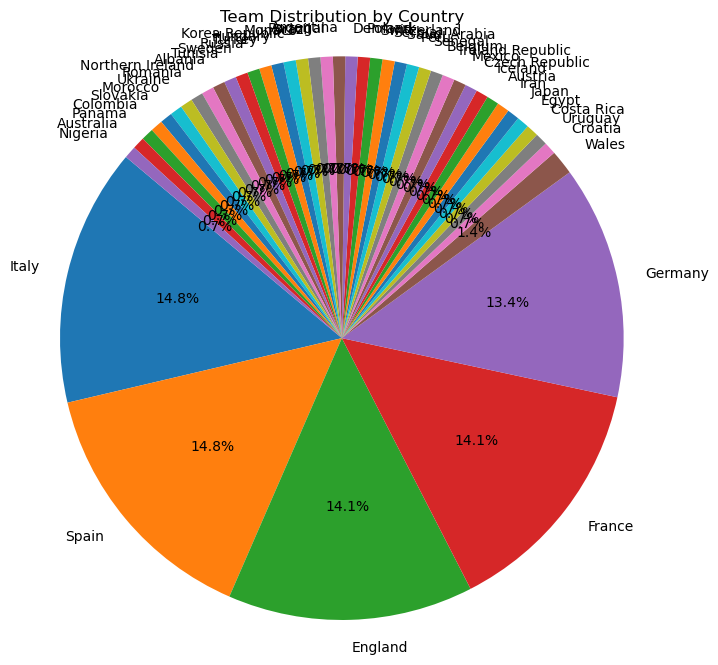

In [89]:
# Group teams by country and count the number of teams in each country
team_distribution = teams_df['area'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_distribution, labels=team_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Team Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

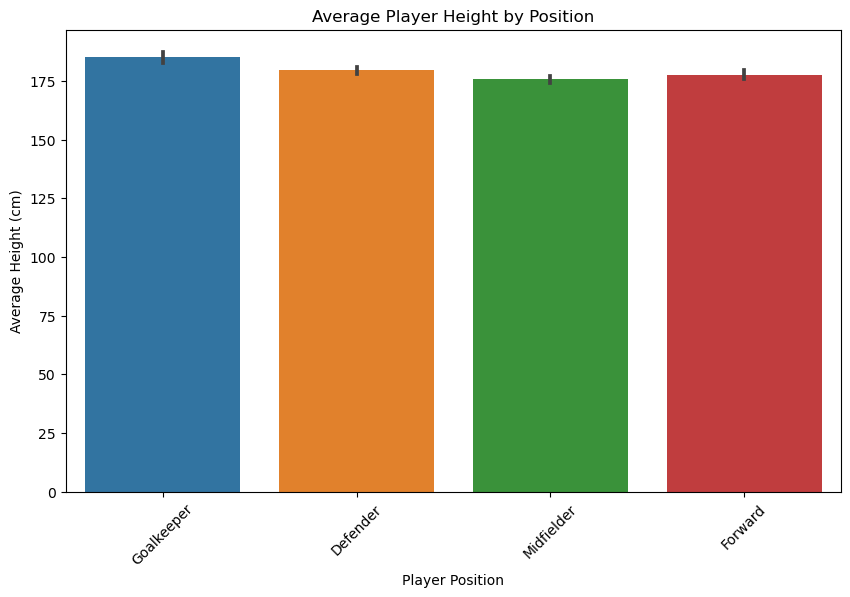

In [72]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=players_df, x='role', y='height', estimator=np.mean)
plt.xlabel('Player Position')
plt.ylabel('Average Height (cm)')
plt.title('Average Player Height by Position')
plt.xticks(rotation=45)
plt.show()

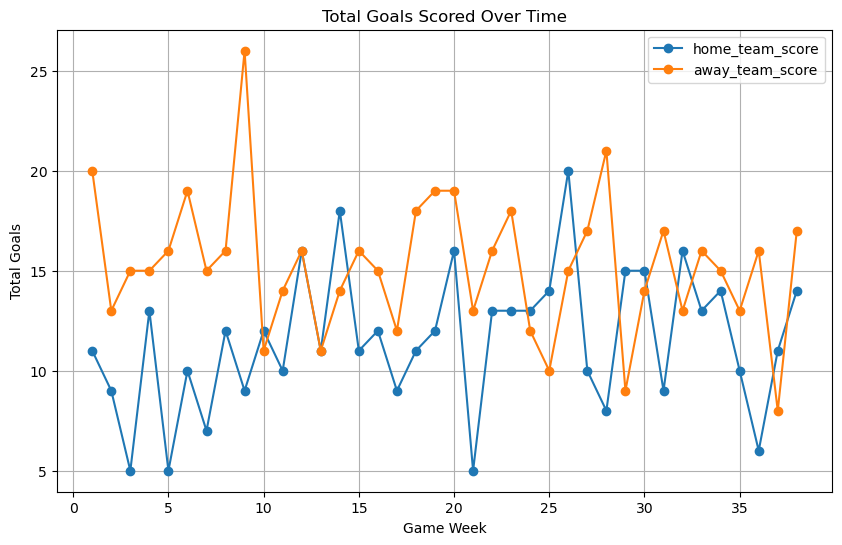

In [73]:
goals_over_time = england_df.groupby('gameweek')[['home_team_score', 'away_team_score']].sum()

# Plot line chart
goals_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Game Week')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored Over Time')
plt.grid(True)
plt.show()

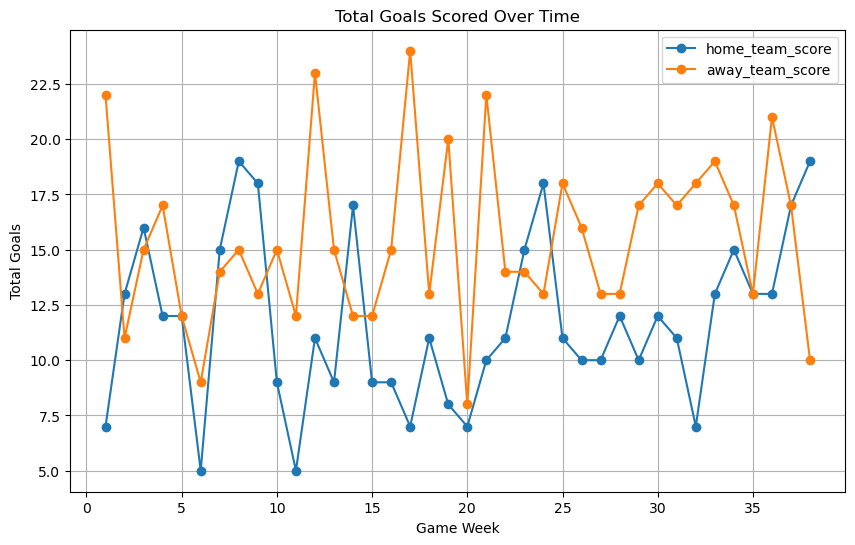

In [75]:
goals_over_time = france_df.groupby('gameweek')[['home_team_score', 'away_team_score']].sum()

# Plot line chart
goals_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Game Week')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored Over Time')
plt.grid(True)
plt.show()

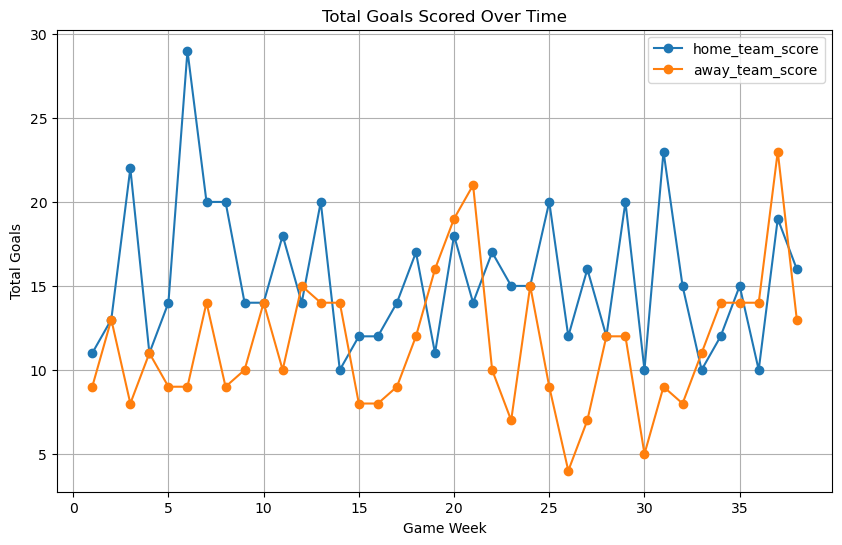

In [76]:
goals_over_time = spain_df.groupby('gameweek')[['home_team_score', 'away_team_score']].sum()

# Plot line chart
goals_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Game Week')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored Over Time')
plt.grid(True)
plt.show()

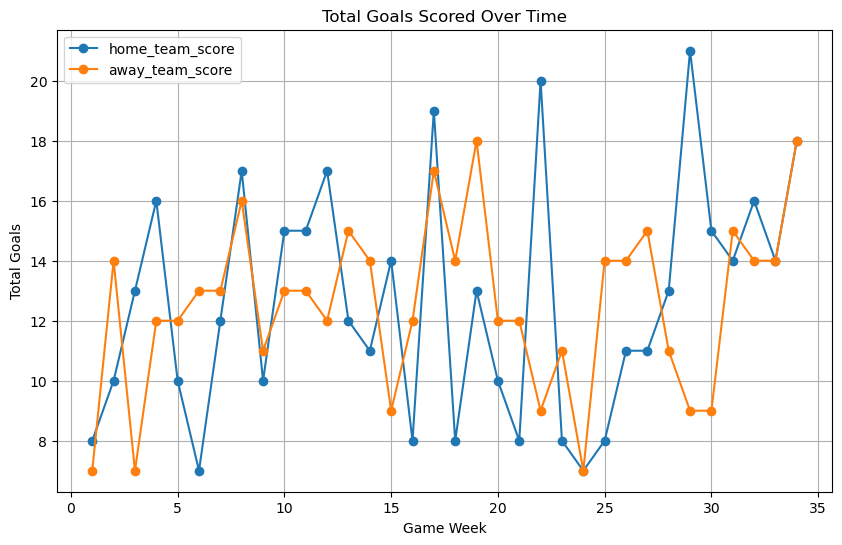

In [77]:
goals_over_time = germany_df.groupby('gameweek')[['home_team_score', 'away_team_score']].sum()

# Plot line chart
goals_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Game Week')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored Over Time')
plt.grid(True)
plt.show()

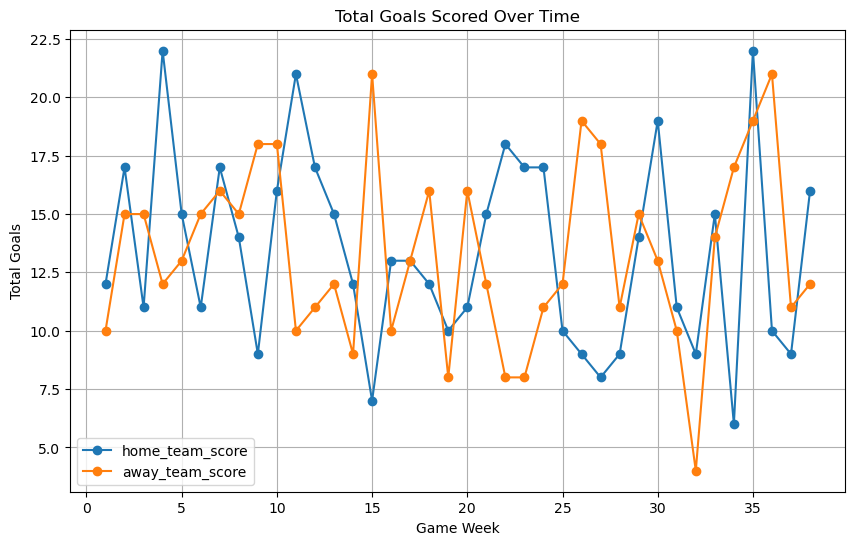

In [78]:
goals_over_time = italy_df.groupby('gameweek')[['home_team_score', 'away_team_score']].sum()

# Plot line chart
goals_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Game Week')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored Over Time')
plt.grid(True)
plt.show()

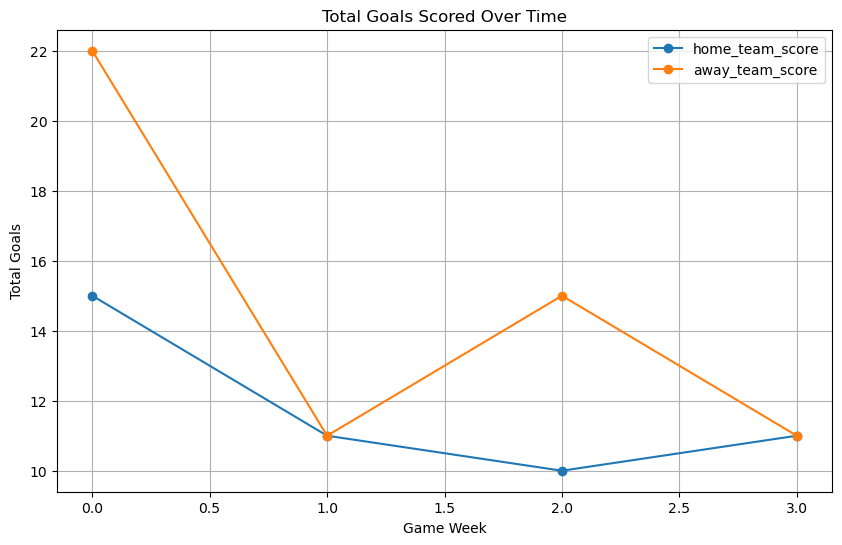

In [79]:
goals_over_time = eu_championship_df.groupby('gameweek')[['home_team_score', 'away_team_score']].sum()

# Plot line chart
goals_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Game Week')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored Over Time')
plt.grid(True)
plt.show()

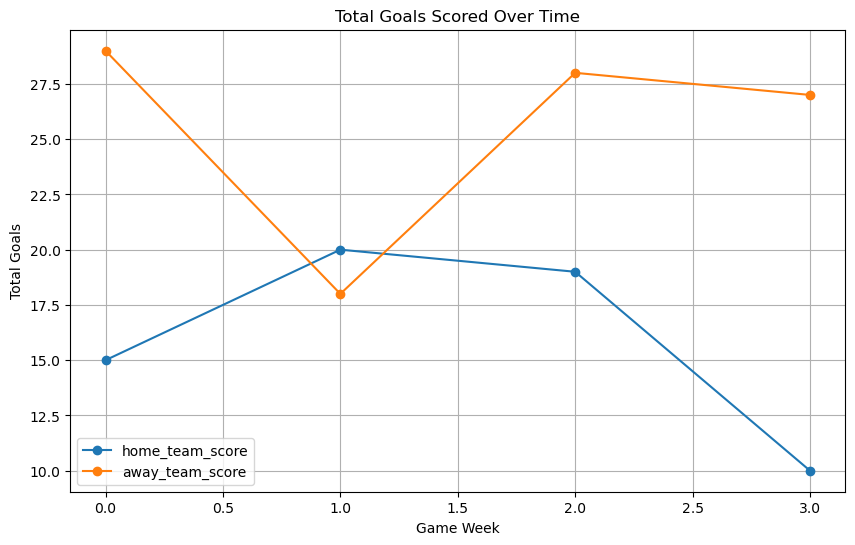

In [80]:
goals_over_time = wc_df.groupby('gameweek')[['home_team_score', 'away_team_score']].sum()

# Plot line chart
goals_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Game Week')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored Over Time')
plt.grid(True)
plt.show()

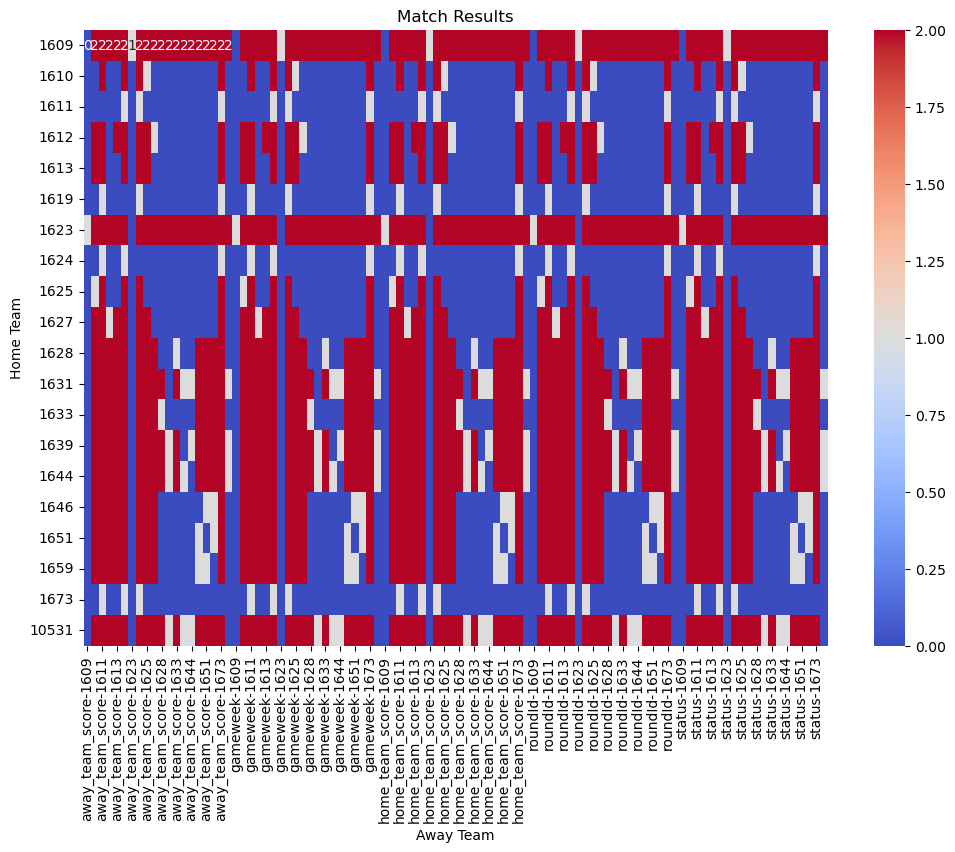

In [84]:
# Create a pivot table with match results
match_results_pivot = pd.pivot_table(england_df, index='home_team_id', columns='away_team_id', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(match_results_pivot, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.title('Match Results')
plt.show()